In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_mldata
from chainer import cuda, Variable, FunctionSet, optimizers
import chainer.functions as F
import sys

%matplotlib inline
plt.style.use('ggplot')

In [2]:
# 確率的勾配法で学習させる際の一回分のバッチサイズ
batchsize = 100

# 学習の繰り返し回数
n_epoch = 20

# 中間層の数
n_units = 1000

# データ
# #HOME/sickit_learn_data/mdlata/mnist-original.mat にキャッシュされる
print('fetch MNIST dataset')
mnist = fetch_mldata('MNIST original')
# mnist.data : 70,000件の784次元ベクトルデータ
mnist.data = mnist.data.astype(np.float32)
mnist.data /= 255 # 0-1のデータに変更

# mnist.target: 正解データ（教師データ）
mnist.target = mnist.target.astype(np.int32)

fetch MNIST dataset


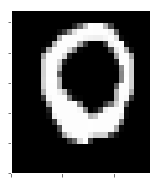

In [7]:
# 手書き数字データを描画する関数
def draw_digit(data):
    size = 28
    plt.figure(figsize=(2.5, 3))
    
    X, Y = np.meshgrid(range(size), range(size))
    Z = data.reshape(size, size) # convert from vector to 28×28 metrix
#     Z = Z[::-1,:] # flip verticle
    plt.xlim(0,27)
    plt.ylim(0,27)
    plt.pcolor(X, Y, Z)
    plt.gray()
    plt.tick_params(labelbottom="off")
    plt.tick_params(labelleft="off")
    
    plt.show()
    
draw_digit(mnist.data[5])